**RH** – Relative Humidity  
Amount of moisture present in the air (%).

**Ws** – Wind Speed  
Speed of the wind (usually in km/h or m/s).

**Rain** – Rainfall  
Amount of precipitation (mm).

**FFMC** – Fine Fuel Moisture Code  
Represents moisture content of fast-drying surface fuels (like grass, pine needles).

**DMC** – Duff Moisture Code  
Indicates moisture level in the upper layer of compact organic material (duff).

**DC** – Drought Code  
Reflects deep soil moisture; describes long-term drought.

**ISI** – Initial Spread Index  
Shows how fast a fire would start spreading.

**BUI** – Build Up Index  
Represents the amount of available fuel based on deeper moisture codes.

**FWI** – Fire Weather Index  
The final fire intensity score combining ISI and BUI.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('merged_data.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [3]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        2
dtype: int64

In [4]:
print(df.columns.tolist())

['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ']


In [5]:
df['Classes  '].value_counts()

Classes  
fire             209
not fire         142
fire               4
not fire           2
not fire           2
fire               2
not fire           2
not fire           1
Name: count, dtype: int64

In [6]:
# 1. Strip whitespace from column name
df.columns = df.columns.str.strip()

# 2. Clean the "Classes" column values
df["Classes"] = (
    df["Classes"]
    .astype(str)
    .str.strip()           # remove spaces
    .str.lower()           # make lowercase
    .replace({
        "fire": "fire",
        "not fire": "not fire"
    })
)

# 3. Verify results
print(df["Classes"].value_counts())


Classes
fire        215
not fire    149
nan           2
Name: count, dtype: int64


In [7]:
# Drop rows where the value is literally the string "nan"
df = df[df["Classes"] != "nan"].reset_index(drop=True)

# Check again
print(df["Classes"].value_counts())


Classes
fire        215
not fire    149
Name: count, dtype: int64


In [8]:
df['Classes'] = df['Classes'].map({'fire':1, 'not fire':0})

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


# Histograms are for : 
- how those numbers are distributed.
- to understand if class im-balance problem 

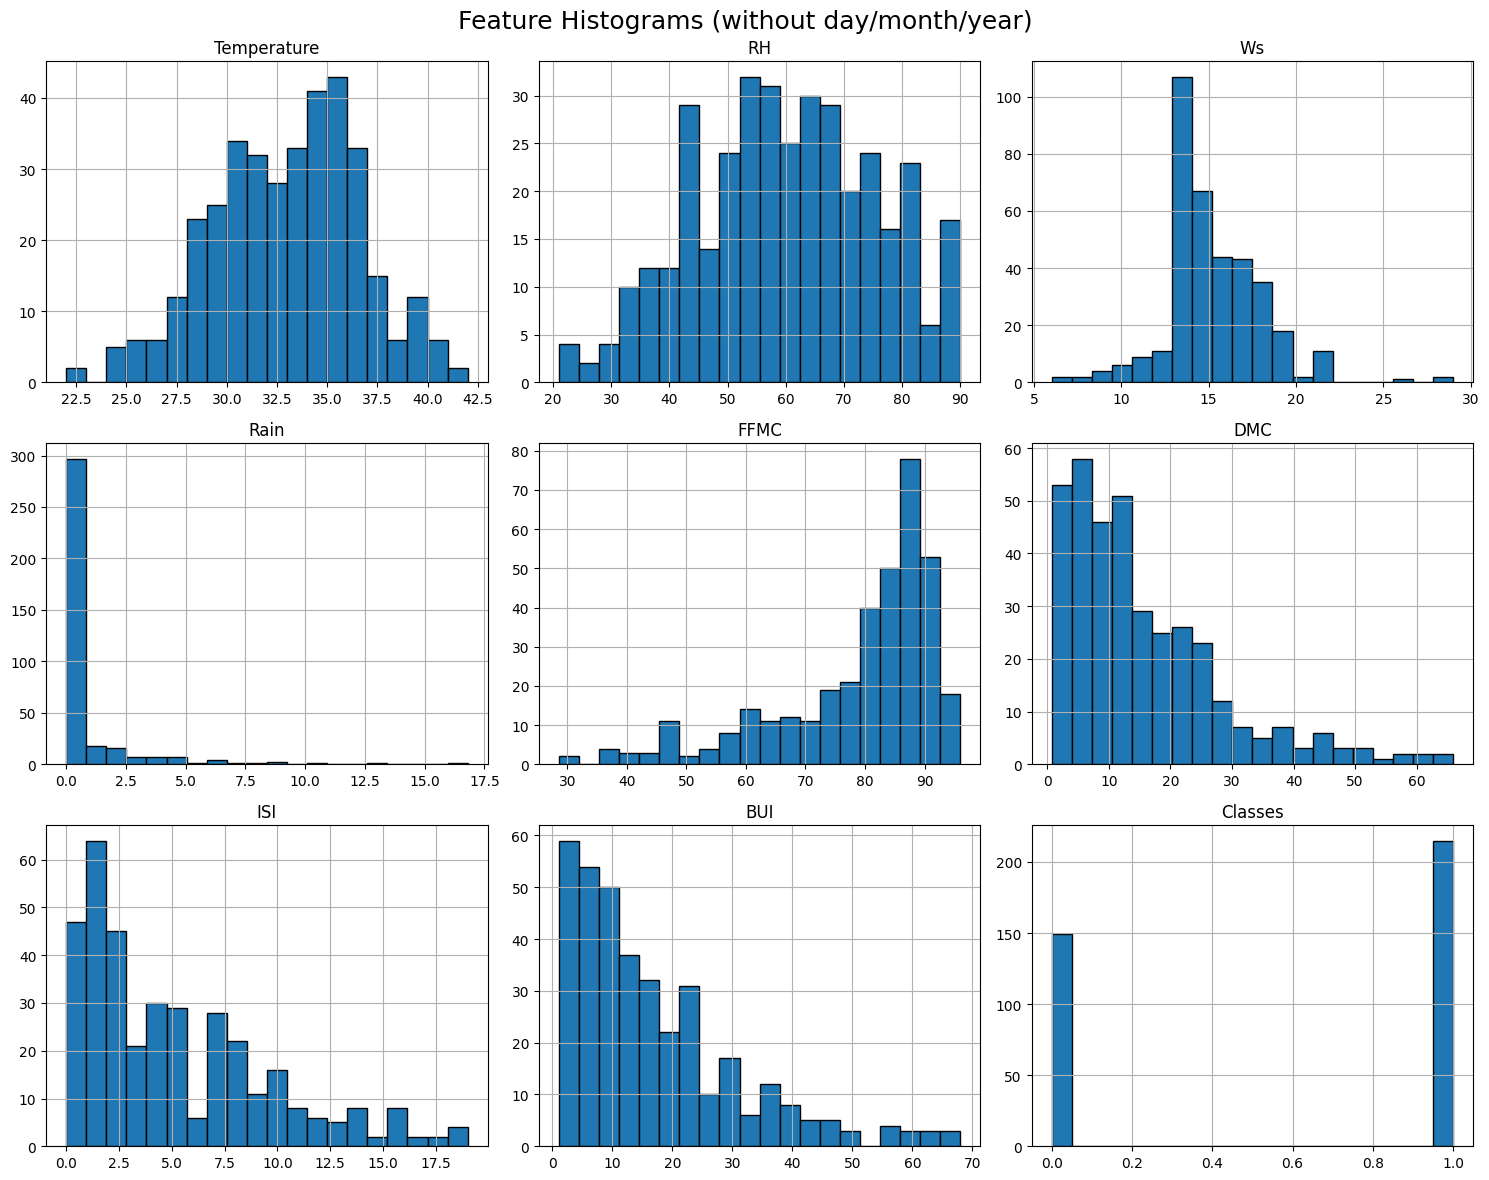

In [10]:
cols_to_drop = ["day", "month", "year"]

df2 = df.drop(columns=cols_to_drop)   

df2.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Feature Histograms (without day/month/year)", fontsize=18)
plt.tight_layout()
plt.show()

In [11]:
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')
df['DC'] = pd.to_numeric(df['DC'], errors='coerce')

In [12]:
df_corr = df.drop(columns=['year'], errors='ignore')

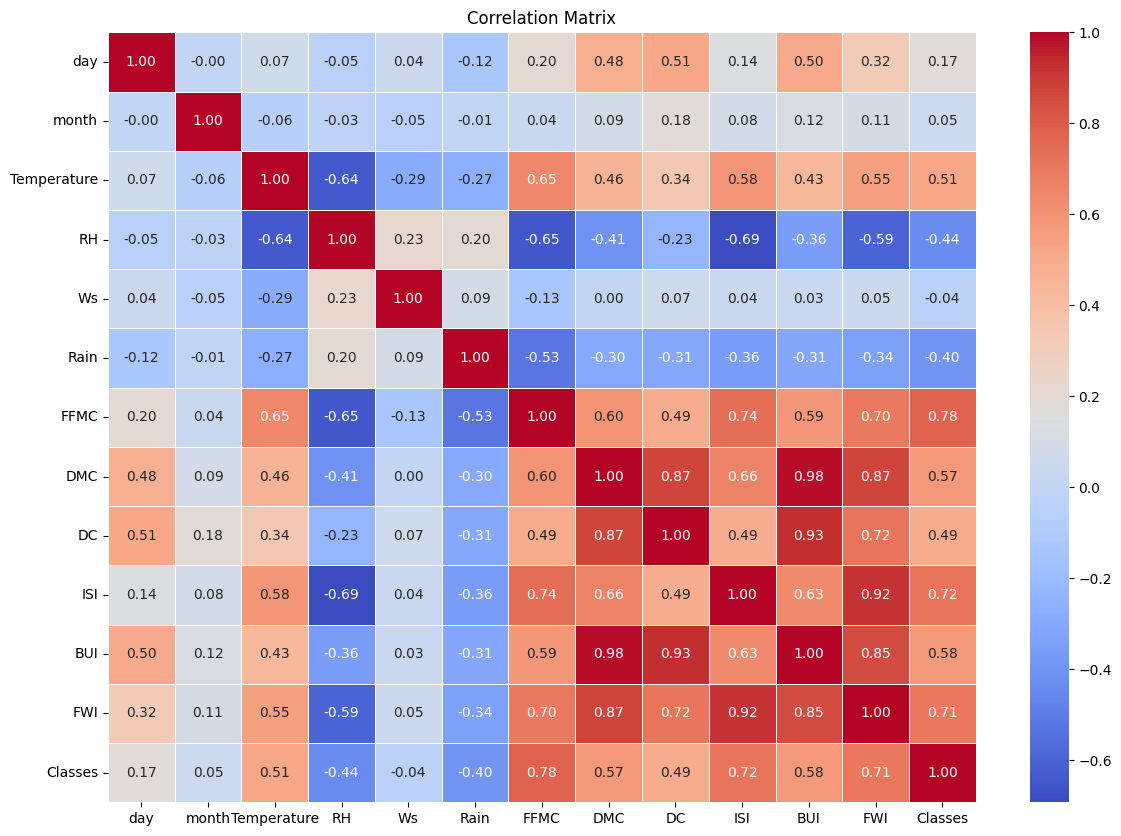

In [13]:
plt.figure(figsize=(14, 10))
corr = df_corr.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Max FWI for NOT FIRE (class 0)
max_not_fire = df[df['Classes'] == 0]['FWI'].max()

# Min FWI for FIRE (class 1)
min_fire = df[df['Classes'] == 1]['FWI'].min()

print("Max FWI for class 0 (not fire):", max_not_fire)
print("Min FWI for class 1 (fire):", min_fire)

Max FWI for class 0 (not fire): 6.1
Min FWI for class 1 (fire): 1.7


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

scaler = MinMaxScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0.000000,0.0,0.0,0.50,0.724638,0.260870,0.041667,0.422849,0.027607,0.006089,0.031579,0.025411,0.006431,0.0
1,0.033333,0.0,0.0,0.40,0.753623,0.304348,0.238095,0.402077,0.030675,0.004215,0.031579,0.026906,0.006431,0.0
2,0.066667,0.0,0.0,0.35,0.855072,0.347826,0.119048,0.298220,0.023006,0.003279,0.015789,0.022422,0.003215,0.0
3,0.100000,0.0,0.0,0.40,0.623188,0.347826,0.000000,0.753709,0.069018,0.039813,0.115789,0.067265,0.032154,0.0
4,0.133333,0.0,0.0,0.50,0.565217,0.347826,0.011905,0.719585,0.081288,0.050117,0.094737,0.080717,0.028939,0.0


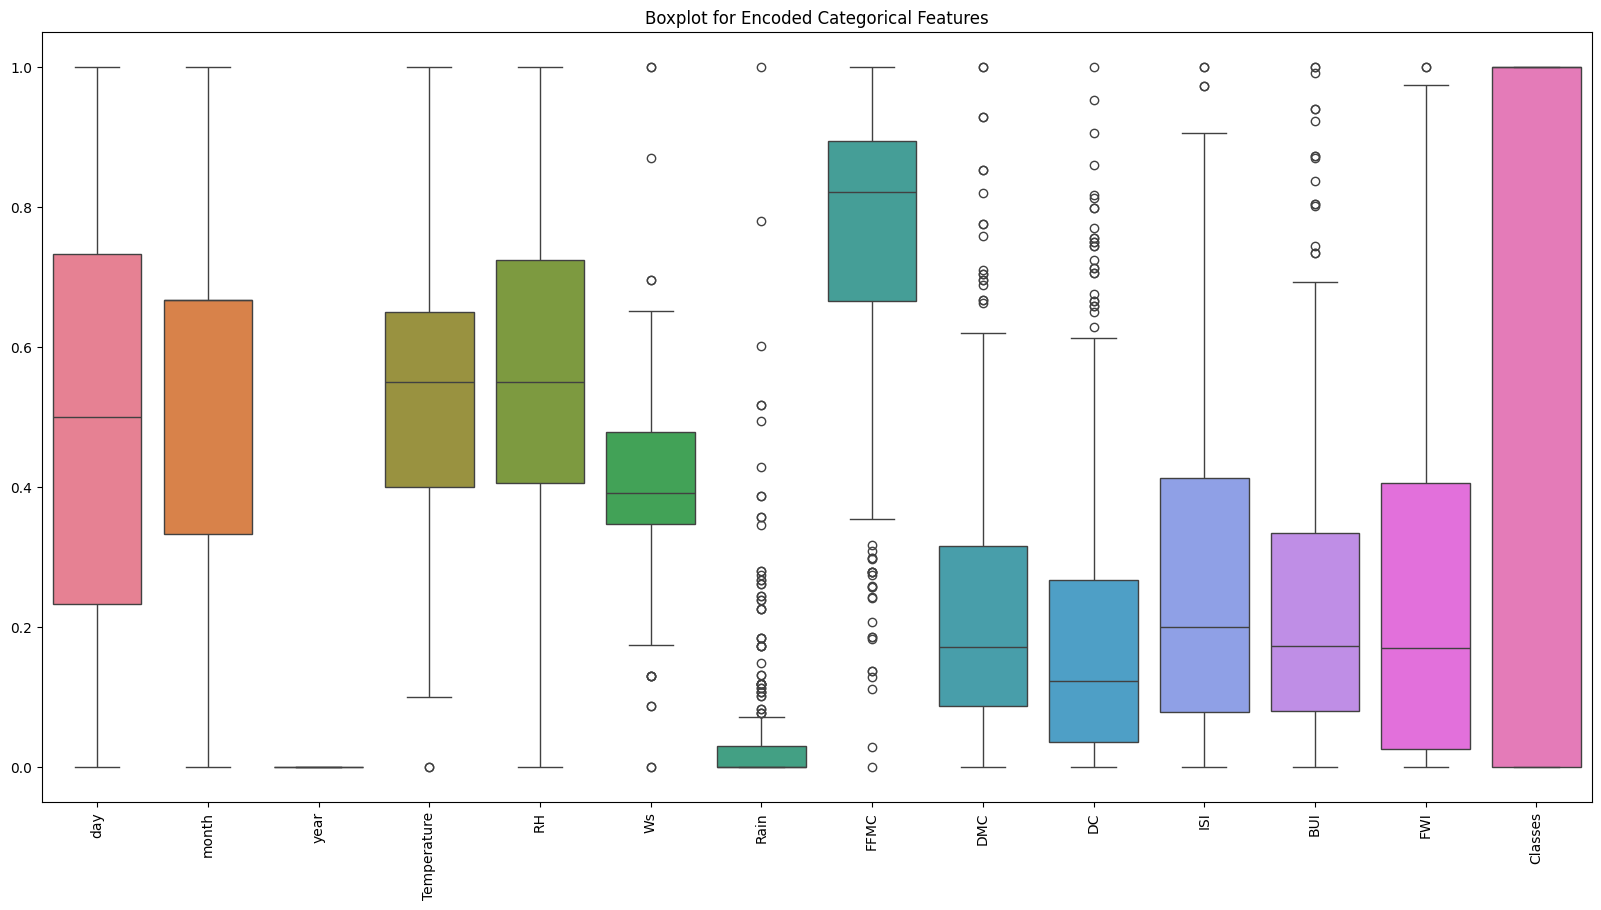

Temperature: 2 outliers
Ws: 13 outliers
Rain: 54 outliers
FFMC: 25 outliers
DMC: 19 outliers
DC: 27 outliers
ISI: 4 outliers
BUI: 16 outliers
FWI: 2 outliers


In [16]:
# Detecting "outliers" in the encoded data using boxplots
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title('Boxplot for Encoded Categorical Features')
plt.xticks(rotation=90)
plt.show()

# Analyze Boxplot for Outliers
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers.empty:
        print(f'{column}: {len(outliers)} outliers')
# Detect and handle outliers
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the medianv 
    df[column] = df[column].where(
        (df[column] >= lower_bound) & (df[column] <= upper_bound),
        df[column].mean()
    )


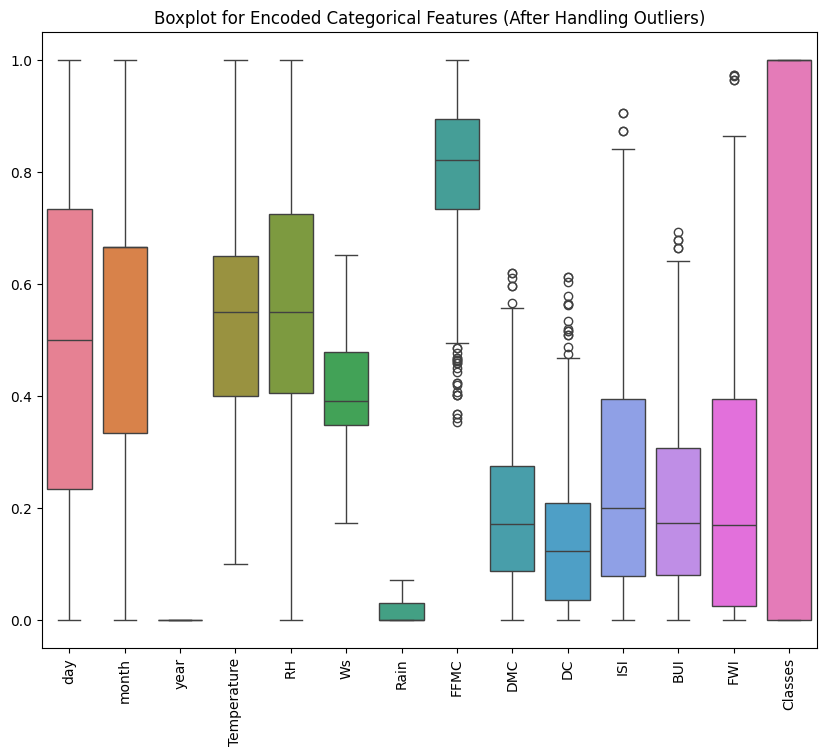

day: 0 outliers
month: 0 outliers
year: 0 outliers
Temperature: 0 outliers
RH: 0 outliers
Ws: 0 outliers
Rain: 0 outliers
FFMC: 23 outliers
DMC: 6 outliers
DC: 15 outliers
ISI: 4 outliers
BUI: 5 outliers
FWI: 5 outliers
Classes: 0 outliers


In [17]:
# Visualize to check for remaining outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Boxplot for Encoded Categorical Features (After Handling Outliers)')
plt.xticks(rotation=90)
plt.show()

# Check for remaining outliers
# Count remaining outliers (IQR method)
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f'{column}: {len(outliers)} outliers')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          364 non-null    float64
 1   month        364 non-null    float64
 2   year         364 non-null    float64
 3   Temperature  364 non-null    float64
 4   RH           364 non-null    float64
 5   Ws           364 non-null    float64
 6   Rain         364 non-null    float64
 7   FFMC         364 non-null    float64
 8   DMC          364 non-null    float64
 9   DC           364 non-null    float64
 10  ISI          364 non-null    float64
 11  BUI          364 non-null    float64
 12  FWI          364 non-null    float64
 13  Classes      364 non-null    float64
dtypes: float64(14)
memory usage: 39.9 KB


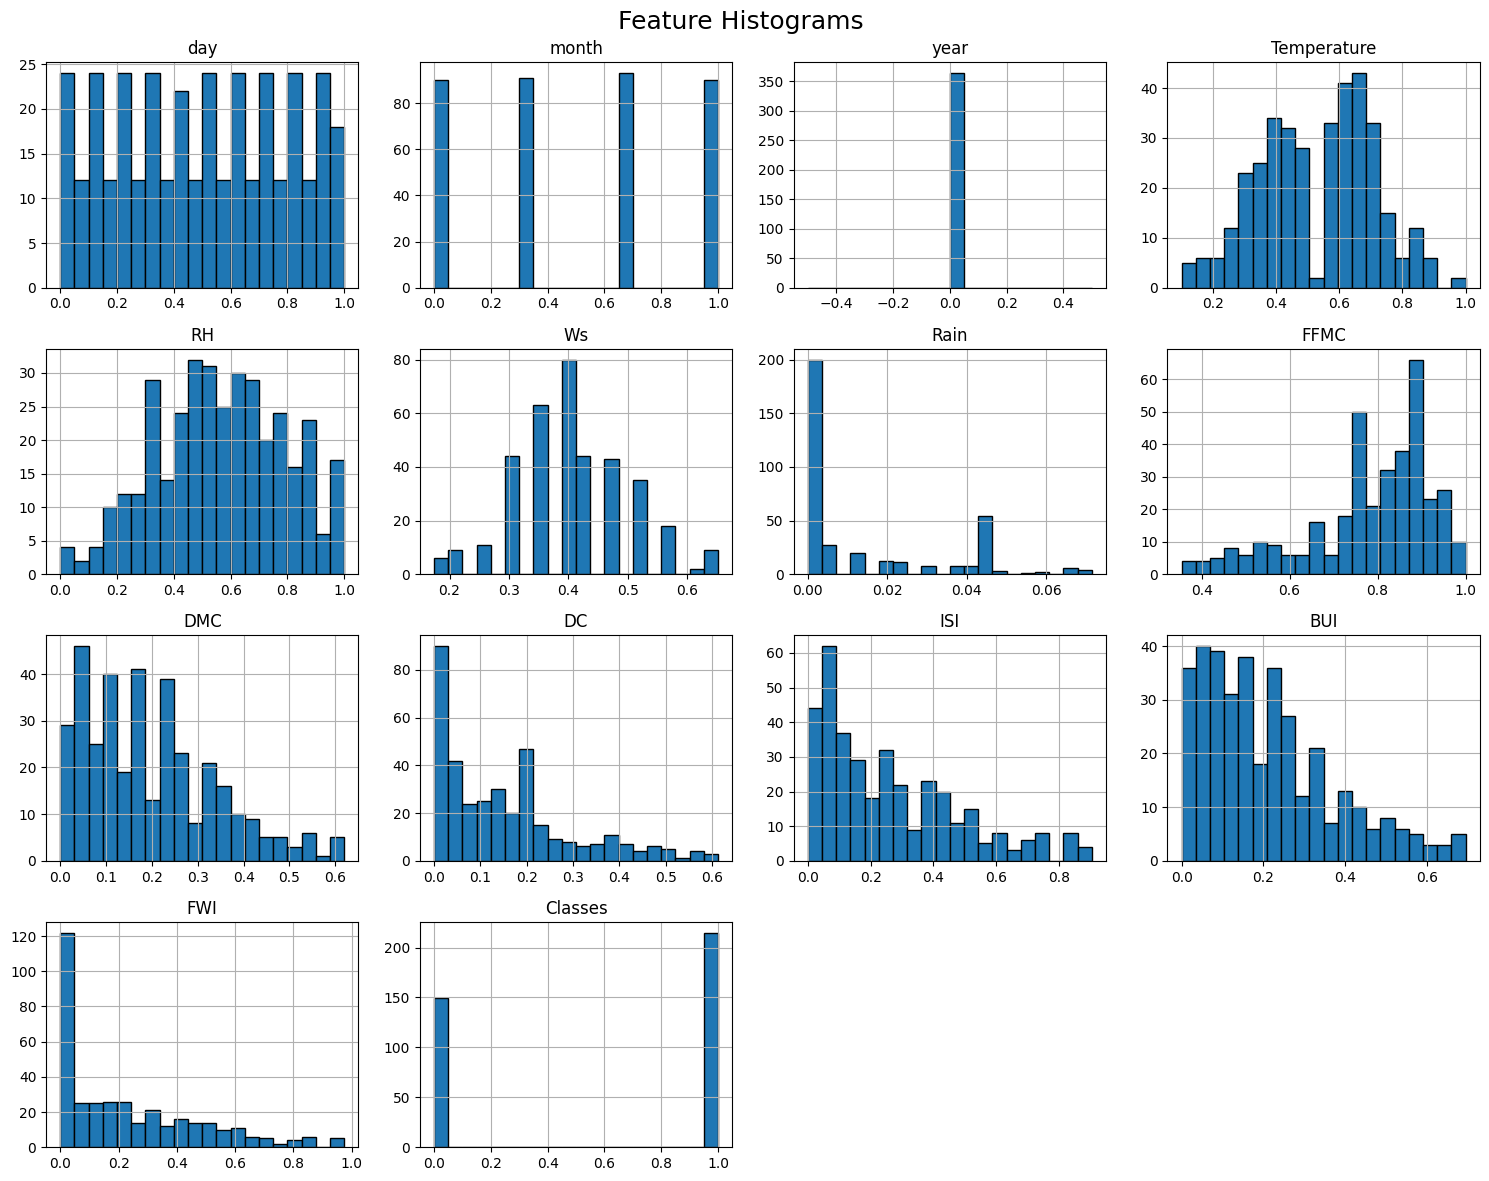

In [21]:
df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Feature Histograms ", fontsize=18)
plt.tight_layout()
plt.show()

In [20]:
print(df.shape)

(364, 14)
